<a href="https://colab.research.google.com/github/jrahemtulla/TeamSolar/blob/main/Project_1_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AA: Data visualisation




In [1]:
# import librairies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm
import scipy

## Berkeley data set 

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
"/content/drive/My Drive/1.001 Project"

'/content/drive/My Drive/1.001 Project'

In [ ]:
## read data_2 csv files
df_2 = pd.read_csv('/content/drive/MyDrive/1.001 Project/Berkeley_data/data_2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,14,30,31,33,34,38,39,52,53,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_2.head()

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,dateOfBatteryInstall,battery_manufacturer,battery_model,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,California Public Utilities Commission,-1,SCE-INT-NST-119437,-1,5-Mar-20,5.800000,18577.40,0.0,RES,0,...,5.052,-1.0,-1.0,1,1.148060,-1,-1,-1,-1.0,-1.0
1,California Public Utilities Commission,-1,SCE-INT-NST-119956,-1,5-Mar-20,3.015000,12813.75,0.0,RES,0,...,0.320,-1.0,-1.0,0,1.046875,-1,-1,-1,-1.0,-1.0
2,California Public Utilities Commission,-1,SCE-INT-NST-120340,-1,5-Mar-20,6.081531,27630.33,0.0,RES,0,...,5.052,-1.0,-1.0,1,1.203787,-1,-1,-1,-1.0,-1.0
3,California Public Utilities Commission,California Energy Commission,SCE-INT-NST-120777,NS004TSG,7-Mar-20,3.015000,13567.51,684.0,RES,0,...,0.320,-1.0,-1.0,0,1.046875,-1,-1,-1,-1.0,-1.0
4,California Public Utilities Commission,-1,SCE-INT-NST-122656,-1,5-Mar-20,6.300000,18100.00,0.0,RES,0,...,6.046,-1.0,-1.0,1,1.042011,-1,-1,-1,-1.0,-1.0


In [ ]:
print(df_2.shape)

#keep only relevant columns (To be chosen from the metadata pdf file)
cols = ['data_provider_1','data_provider_2', 'installation_date', 'system_size_DC','total_installed_price', 'rebate_or_grant', \
        'customer_segment', 'zip_code', 'city', 'state', 'azimuth_1','azimuth_2', 'azimuth_3', \
       'tilt_1', 'tilt_2', 'tilt_3','efficiency_module_1','efficiency_module_2', 'efficiency_module_3',\
      'dateOfBatteryInstall', 'battery_rated_capacity_kWh']

df_2= df_2[cols]

print(df_2.shape)

(1041551, 81)
(1041551, 21)


In [ ]:

#Conserve only residential utilities
df_2.drop(df_2[df_2.customer_segment != 'RES'].index,axis = 0, inplace = True) 

print(df_2.shape)

#Convert str date to numeric date

df_2['installation_date'] = pd.to_datetime(df_2['installation_date'],errors='coerce')


(1013856, 21)


In [ ]:
df_2.head()

,data_provider_1,data_provider_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,zip_code,city,state,...,azimuth_2,azimuth_3,tilt_1,tilt_2,tilt_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,dateOfBatteryInstall,battery_rated_capacity_kWh
0,California Public Utilities Commission,-1,2020-03-05,5.800000,18577.40,0.0,RES,92586,SUN CITY,CA,...,-1.0,-1.0,18,-1,-1,0.173138,-1.0,-1.0,-1,-1.0
1,California Public Utilities Commission,-1,2020-03-05,3.015000,12813.75,0.0,RES,92530,LAKE ELSINORE,CA,...,-1.0,-1.0,18,-1,-1,0.205431,-1.0,-1.0,-1,-1.0
2,California Public Utilities Commission,-1,2020-03-05,6.081531,27630.33,0.0,RES,92509,RIVERSIDE,CA,...,-1.0,-1.0,22,-1,-1,0.173138,-1.0,-1.0,-1,-1.0
3,California Public Utilities Commission,California Energy Commission,2020-03-07,3.015000,13567.51,684.0,RES,92562,Menifee,CA,...,-1.0,-1.0,18,-1,-1,0.205431,-1.0,-1.0,-1,-1.0
4,California Public Utilities Commission,-1,2020-03-05,6.300000,18100.00,0.0,RES,92823,BREA,CA,...,-1.0,-1.0,8,-1,-1,0.212288,-1.0,-1.0,-1,-1.0


In [ ]:
#Reformat installation date in two columns: month and year
# Create new columns

df_2['installation_month'] = df_2['installation_date'].dt.month
df_2.dropna(axis = 0,subset= ['installation_month'],inplace = True)
df_2['installation_month'] = df_2['installation_month'].astype('int64')


df_2['installation_year'] = df_2['installation_date'].dt.year
df_2.dropna(axis = 0,subset= ['installation_year'],inplace = True)
df_2['installation_year'] = df_2['installation_year'].astype('int64')



df_2.drop('installation_date', inplace=True, axis=1)
df_2.shape

(1012159, 22)

In [ ]:
df_2.head()

,data_provider_1,data_provider_2,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,zip_code,city,state,azimuth_1,...,tilt_1,tilt_2,tilt_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,dateOfBatteryInstall,battery_rated_capacity_kWh,installation_month,installation_year
0,California Public Utilities Commission,-1,5.800000,18577.40,0.0,RES,92586,SUN CITY,CA,268.0,...,18,-1,-1,0.173138,-1.0,-1.0,-1,-1.0,3,2020
1,California Public Utilities Commission,-1,3.015000,12813.75,0.0,RES,92530,LAKE ELSINORE,CA,178.0,...,18,-1,-1,0.205431,-1.0,-1.0,-1,-1.0,3,2020
2,California Public Utilities Commission,-1,6.081531,27630.33,0.0,RES,92509,RIVERSIDE,CA,180.0,...,22,-1,-1,0.173138,-1.0,-1.0,-1,-1.0,3,2020
3,California Public Utilities Commission,California Energy Commission,3.015000,13567.51,684.0,RES,92562,Menifee,CA,138.0,...,18,-1,-1,0.205431,-1.0,-1.0,-1,-1.0,3,2020
4,California Public Utilities Commission,-1,6.300000,18100.00,0.0,RES,92823,BREA,CA,260.0,...,8,-1,-1,0.212288,-1.0,-1.0,-1,-1.0,3,2020


In [ ]:
#Check that the dates are consistent

print('the first year data was recorded is: ' + str(min(df_2['installation_year'])))
print('the last year data was recorded is: ' + str(max(df_2['installation_year'])))

print('The range of months in the dataset is:' + str(min(df_2['installation_month'])) + '-'  + str(max(df_2['installation_month'])))

the first year data was recorded is: 1996
the last year data was recorded is: 2020
The range of months in the dataset is:1-12


In [ ]:
#clean the data on installed price/rebate_or_grant (only positive or null numeric values)

print(df_2.shape)

#rebate/grant

df_2['rebate_or_grant'] = pd.to_numeric(df_2['rebate_or_grant'], errors = 'coerce')
df_2.dropna(axis = 0,subset= ['rebate_or_grant'],inplace = True)

(1012159, 22)


In [ ]:
#Check if there are negative values and what they are
idx = df_2[df_2.rebate_or_grant < 0].index 
val = [df_2.rebate_or_grant[i] for i in idx]
print('The negative values on rebate column are: ' + str(set(val))) #Only -1 

# Hypothesis: they could not collect data, shoud we keep the row and set rebate to 0 ? (discard for now)

df_2.drop(df_2[df_2.rebate_or_grant < 0].index,axis = 0, inplace = True) 

The negative values on rebate column are: {-1.0}


In [ ]:
#installation price

df_2['total_installed_price'] = pd.to_numeric(df_2['total_installed_price'], errors = 'coerce')
df_2.dropna(axis = 0,subset= ['total_installed_price'],inplace = True)


In [ ]:
idx = df_2[df_2.total_installed_price < 0].index 
val = [df_2.total_installed_price[i] for i in idx]
print('The negative values on total_installed_price column are: ' + str(set(val))) #Only -1 

# Hypothesis: they could not collect data, shoud we keep the row and set total installed price to 0 ? (discard for now)
df_2.drop(df_2[df_2.total_installed_price < 0].index,axis = 0, inplace = True) 

print(df_2.shape)

The negative values on total_installed_price column are: {-1.0}
(827733, 22)


In [ ]:
# Socio-demographic study 


states = set(df_2['state']) #different states in the dataset (california and wisconsin)
ca = len(df_2[(df_2['state'] == 'CA')]) 
wi = len(df_2[(df_2['state'] == 'WI')]) #peanuts --> discard 

df_2.drop(df_2[df_2.state == 'WI'].index,axis = 0, inplace = True) 

data_provider_1 = set(df_2['data_provider_1']) #different 1st data provider in the dataset (only California Public Utilities Commission)
data_provider_2 = set(df_2['data_provider_2']) # different 2nd data provider in the dataset
# {'-1','California Energy Commission','California Energy Commission & California Public Utilities Commission',
#'California Public Utilities Commission', 'California Public Utilities Commission & California Public Utilities Commission'}

In [ ]:
df_2['data_provider'] = 'Public Utilities Commission'

df_2.loc[(df_2['data_provider_2'] == 'California Energy Commission'), 'data_provider'] = 'Energy Commission  & Public Utilities Commission'
df_2.loc[(df_2['data_provider_2'] == 'California Energy Commission & California Public Utilities Commission'), 'data_provider'] = 'Energy Commission  & Public Utilities Commission'

df_2.drop('data_provider_1', inplace=True, axis=1)
df_2.drop('data_provider_2', inplace=True, axis=1)
df_2.dropna(axis = 0,subset= ['data_provider'],inplace = True)

KeyError: ignored

In [ ]:
df_2.head()

,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,zip_code,city,state,azimuth_1,azimuth_2,azimuth_3,...,tilt_2,tilt_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,dateOfBatteryInstall,battery_rated_capacity_kWh,installation_month,installation_year,data_provider
0,5.800000,18577.40,0.0,RES,92586,SUN CITY,CA,268.0,-1.0,-1.0,...,-1,-1,0.173138,-1.0,-1.0,-1,-1.0,3,2020,Public Utilities Commission
1,3.015000,12813.75,0.0,RES,92530,LAKE ELSINORE,CA,178.0,-1.0,-1.0,...,-1,-1,0.205431,-1.0,-1.0,-1,-1.0,3,2020,Public Utilities Commission
2,6.081531,27630.33,0.0,RES,92509,RIVERSIDE,CA,180.0,-1.0,-1.0,...,-1,-1,0.173138,-1.0,-1.0,-1,-1.0,3,2020,Public Utilities Commission
3,3.015000,13567.51,684.0,RES,92562,Menifee,CA,138.0,-1.0,-1.0,...,-1,-1,0.205431,-1.0,-1.0,-1,-1.0,3,2020,Public Utilities Commission
4,6.300000,18100.00,0.0,RES,92823,BREA,CA,260.0,-1.0,-1.0,...,-1,-1,0.212288,-1.0,-1.0,-1,-1.0,3,2020,Public Utilities Commission


In [ ]:
df_2.dropna(axis = 0,subset= ['system_size_DC'],inplace = True)
df_2.drop(df_2[df_2.system_size_DC < 0].index,axis = 0, inplace = True) 
df_2['system_size_DC']

0           5.800000
1           3.015000
2           6.081531
3           3.015000
4           6.300000
             ...    
1031743     8.112347
1031745     9.914969
1031746     9.810000
1031748    10.180000
1031749    10.617020
Name: system_size_DC, Length: 822332, dtype: float64

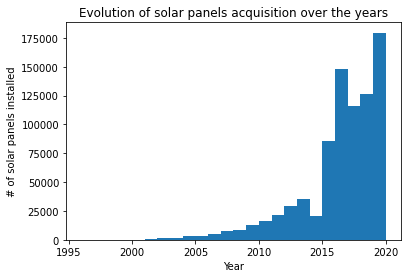

In [ ]:
#Distribution of solar panels acquisition throughout the years 


plt.hist(df_2['installation_year'],bins = range(1996,2021)) #Question: plot the evolution of ITC over the years: does that seem correlated
plt.title("Evolution of solar panels acquisition over the years")
plt.xlabel("Year")
plt.ylabel("# of solar panels installed")
plt.show()
    

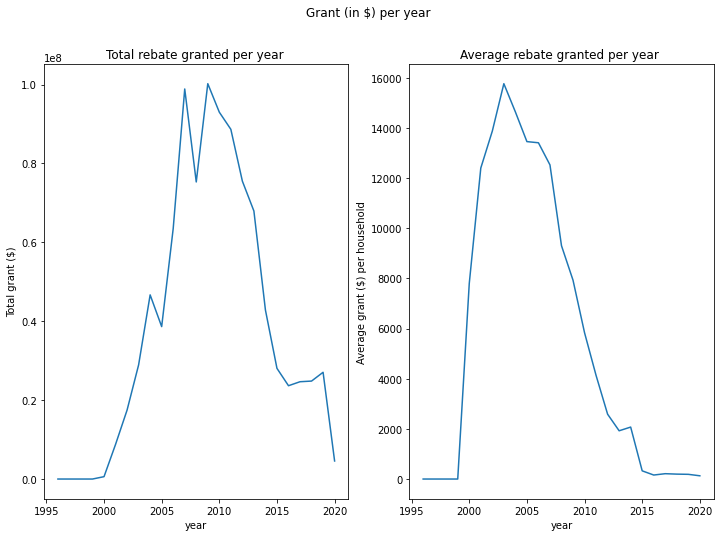

In [ ]:
#Comparison with the rebate/grant number of solar panels installed
rebate = np.zeros(len(range(1996,2021))) #from 1996 to 2020 (included)
rebate_norm = np.zeros(len(range(1996,2021))) #per household (in average)

for i in range(1996,2021): 
    idx = df_2[df_2.installation_year == i].index.values
    rebate[i-1996] = sum(df_2['rebate_or_grant'][idx])
    rebate_norm[i-1996] = rebate[i-1996]/max(len(idx),1) #avoid dividing by 0

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,8))
fig.suptitle('Grant (in $) per year')
ax1.plot(range(1996,2021), rebate)
ax1.set_title('Total rebate granted per year ')
ax1.set(xlabel='year', ylabel='Total grant ($)')
ax2.plot(range(1996,2021), rebate_norm)
ax2.set_title('Average rebate granted per year ')
ax2.set(xlabel='year', ylabel='Average grant ($) per household')

fig.show()

100%|██████████| 10/10 [00:00<00:00, 62.37it/s]


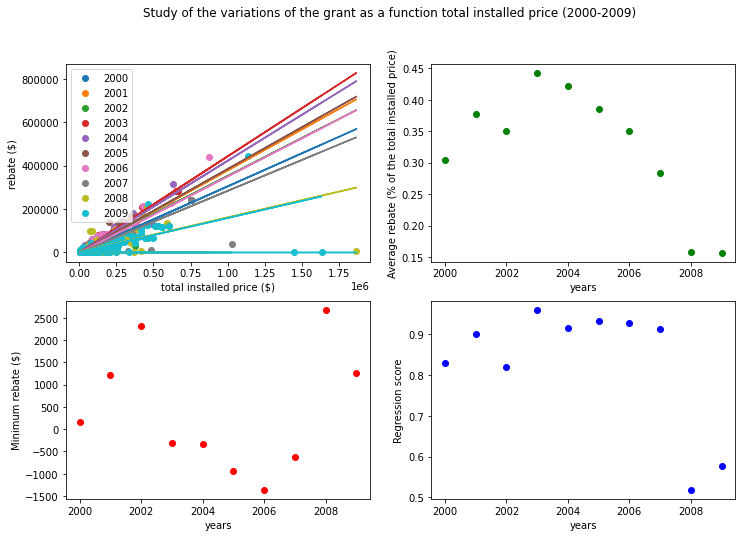

In [ ]:
## rebate vs total installed price as a function of the years (by decade) 

## WE CAN VARY THE YEARS OR MAKE PLOT YEAR PER YEAR ()


from sklearn.linear_model import LinearRegression
#model a_0*X + b_0 = Y

fig,((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2,figsize=(12,8))
fig.suptitle('Study of the variations of the grant as a function total installed price (2000-2009)')
a_0 = np.zeros(10)
b_0 = np.zeros(10)
r_sq = np.zeros(10)



for i in tqdm(range(2000,2010)):
  idx = df_2[(df_2.installation_year == i)].index.values
  X  = df_2['total_installed_price'][idx].values.reshape((-1, 1))
  Y = df_2['rebate_or_grant'][idx].values
  model = LinearRegression().fit(X, Y)
  r_sq[i-2000] = model.score(X, Y).astype('float64')
  b_0[i-2000] = model.intercept_.astype('float64')
  a_0[i-2000] =  model.coef_.astype('float64')
  ax1.scatter(df_2['total_installed_price'][idx],df_2['rebate_or_grant'][idx], label = str(i))
  ax1.plot(X,a_0*X + b_0)


ax1.legend(loc = 'upper left')
ax1.set(xlabel='total installed price ($)', ylabel= 'rebate ($)')
ax2.set(xlabel='years', ylabel= 'Average rebate (% of the total installed price)')
ax3.set(xlabel='years', ylabel= 'Minimum rebate ($)')
ax4.set(xlabel='years', ylabel= 'Regression score')
ax2.scatter(range(2000,2010),a_0, color = 'green')
ax3.scatter(range(2000,2010),b_0,color = 'red')
ax4.scatter(range(2000,2010),r_sq,color = 'blue')
fig.show()



In [ ]:
## rebate vs total installed price as a function of the years (by decade) 

## WE CAN VARY THE YEARS OR MAKE PLOT YEAR PER YEAR ()


from sklearn.linear_model import LinearRegression
#model a_0*X + b_0 = Y

fig,((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2,figsize=(12,8))
fig.suptitle('Study of the variations of the grant as a function total installed price (2010-2018)')
a_0 = np.zeros(10)
b_0 = np.zeros(10)
r_sq = np.zeros(10)

for i in tqdm(range(2010,2020)):
  idx = df_2[(df_2.installation_year == i)].index.values
  X  = df_2['total_installed_price'][idx].values.reshape((-1, 1))
  Y = df_2['rebate_or_grant'][idx].values
  model = LinearRegression().fit(X, Y)
  r_sq[i-2010] = model.score(X, Y).astype('float64')
  b_0[i-2010] = model.intercept_.astype('float64')
  a_0[i-2010] =  model.coef_.astype('float64')
  ax1.scatter(df_2['total_installed_price'][idx],df_2['rebate_or_grant'][idx], label = str(i))
  ax1.plot(X,a_0*X + b_0)


ax1.legend(loc = 'upper right')
ax1.set(xlabel='total installed price ($)', ylabel= 'rebate ($)')
ax2.set(xlabel='years', ylabel= 'Average rebate (% of the total installed price)')
ax3.set(xlabel='years', ylabel= 'Minimum rebate ($)')
ax4.set(xlabel='years', ylabel= 'Regression score')
ax2.scatter(range(2010,2020),a_0, color = 'green')
ax3.scatter(range(2010,2020),b_0,color = 'red')
ax4.scatter(range(2010,2020),r_sq,color = 'blue')
fig.show()

NameError: ignored

100%|██████████| 10/10 [00:00<00:00, 61.44it/s]


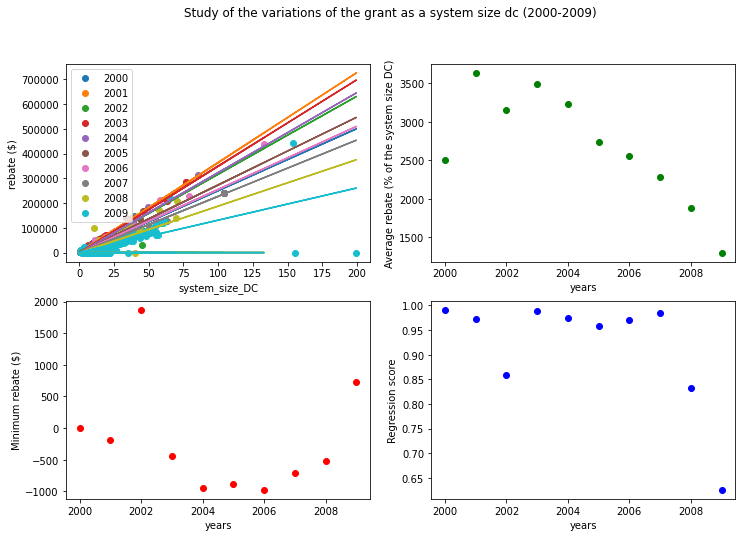

In [ ]:
## rebate vs total system_size_DC as a function of the years (by decade) 

## WE CAN VARY THE YEARS OR MAKE PLOT YEAR PER YEAR ()


from sklearn.linear_model import LinearRegression
#model a_0*X + b_0 = Y

fig,((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2,figsize=(12,8))
fig.suptitle('Study of the variations of the grant as a system size dc (2000-2009)')
a_0 = np.zeros(10)
b_0 = np.zeros(10)
r_sq = np.zeros(10)



for i in tqdm(range(2000,2010)):
  idx = df_2[(df_2.installation_year == i)].index.values
  X  = df_2['system_size_DC'][idx].values.reshape((-1, 1))
  Y = df_2['rebate_or_grant'][idx].values
  model = LinearRegression().fit(X, Y)
  r_sq[i-2000] = model.score(X, Y).astype('float64')
  b_0[i-2000] = model.intercept_.astype('float64')
  a_0[i-2000] =  model.coef_.astype('float64')
  ax1.scatter(df_2['system_size_DC'][idx],df_2['rebate_or_grant'][idx], label = str(i))
  ax1.plot(X,a_0*X + b_0)


ax1.legend(loc = 'upper left')
ax1.set(xlabel='system_size_DC', ylabel= 'rebate ($)')
ax2.set(xlabel='years', ylabel= 'Average rebate (% of the system size DC)')
ax3.set(xlabel='years', ylabel= 'Minimum rebate ($)')
ax4.set(xlabel='years', ylabel= 'Regression score')
ax2.scatter(range(2000,2010),a_0, color = 'green')
ax3.scatter(range(2000,2010),b_0,color = 'red')
ax4.scatter(range(2000,2010),r_sq,color = 'blue')
fig.show()


100%|██████████| 10/10 [00:00<00:00, 12.95it/s]


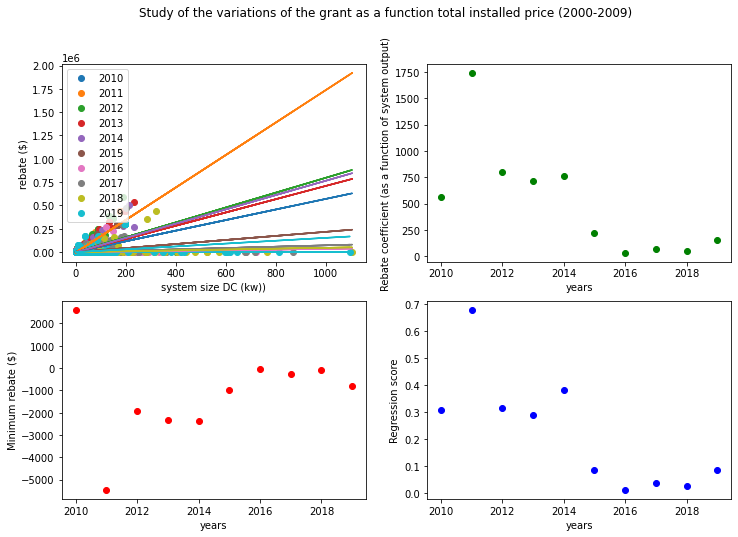

In [ ]:
## decade 2010-2020

fig,((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2,figsize=(12,8))
fig.suptitle('Study of the variations of the grant as a function total installed price (2000-2009)')
a_0 = np.zeros(10)
b_0 = np.zeros(10)
r_sq = np.zeros(10)

for i in tqdm(range(2010,2020)):
  idx = df_2[(df_2.installation_year == i)].index.values
  X  = df_2['system_size_DC'][idx].values.reshape((-1, 1))
  Y = df_2['rebate_or_grant'][idx].values
  model = LinearRegression().fit(X, Y)
  r_sq[i-2010] = model.score(X, Y).astype('float64')
  b_0[i-2010] = model.intercept_.astype('float64')
  a_0[i-2010] =  model.coef_.astype('float64')
  ax1.scatter(df_2['system_size_DC'][idx],df_2['rebate_or_grant'][idx], label = str(i))
  ax1.plot(X,a_0*X + b_0)


ax1.legend(loc = 'upper left')
ax1.set(xlabel='system size DC (kw))', ylabel= 'rebate ($)')
ax2.set(xlabel='years', ylabel= 'Rebate coefficient (as a function of system output)')
ax3.set(xlabel='years', ylabel= 'Minimum rebate ($)')
ax4.set(xlabel='years', ylabel= 'Regression score')
ax2.scatter(range(2010,2020),a_0, color = 'green')
ax3.scatter(range(2010,2020),b_0,color = 'red')
ax4.scatter(range(2010,2020),r_sq,color = 'blue')
fig.show()

Comments on R^2 and outliers: 


As the years increase, $R^2$ decreases. It is due to the fact that, in absolute value, the number of households installing solar panels increases. In that perspective, human people may have unpredictable behaviour (i.e not taking advantage of the grant at all or not fully), becaause they are not aware of it for example. 

In addition, we notice by comparing regression in system output and total installed price that the two seems very related (outliers on the graphs of 2000-2009 for example). Does the size of the panel or other weather-related parameters are important (i.e correlation coefficient) in the final electrical output ? 

Finally, how everything organizes itself when it comes to the attribution of the grant ? (General correlation coefficient with numeric columns: is it what we expect ?) 

In [ ]:
#keep only first tilt/azimuth for simplicity

df_2.drop('azimuth_2',axis = 1, inplace = True) 

In [ ]:
df_2.drop('azimuth_3',axis = 1, inplace = True) 
df_2.drop('tilt_2',axis = 1, inplace = True) 
df_2.drop('tilt_3',axis = 1, inplace = True) 

In [ ]:
nulls = df_2.isnull().sum().sort_values(ascending=False)[0:20]
data = df_2.select_dtypes(include=[np.number]).interpolate().dropna(axis=0)
sum(data.isnull().sum() != 0)
data.shape

(822332, 11)

In [ ]:
numeric = data.select_dtypes(include=[np.number])
numeric.head()
corr = numeric.corr()
cols = corr['rebate_or_grant'].sort_values(ascending=False)[:10]
cols

cols2 = corr['total_installed_price'].sort_values(ascending=False)[:10]
cols2

total_installed_price         1.000000
system_size_DC                0.745678
rebate_or_grant               0.464653
efficiency_module_2           0.019926
battery_rated_capacity_kWh    0.017323
tilt_1                        0.004939
azimuth_1                     0.004900
installation_month           -0.004645
efficiency_module_3          -0.005560
efficiency_module_1          -0.028328
Name: total_installed_price, dtype: float64

Conclusion: rebate is particularly influenced by the total installed price -> unfairness.

## Stanford dataset 

In [ ]:
url= "http://web.stanford.edu/group/deepsolar/deepsolar_tract.csv"
data= pd.read_csv(url, encoding='cp1252')

In [ ]:
data.head()

,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0,0.0,0.0,0.000000,27145011200,70352.789869,Stearns County,569,1690,13,...,39,11,13,34,0,0,25,12,0,9.46
1,1,25.0,21.0,1133.436461,27145011301,61727.085202,Stearns County,674,1434,108,...,39,11,13,34,0,0,25,12,0,9.46
2,2,3.0,3.0,64.505776,27145011302,71496.886583,Stearns County,854,1459,31,...,39,11,13,34,0,0,25,12,0,9.46
3,3,0.0,0.0,0.000000,27145011304,86840.152755,Stearns County,640,1116,68,...,39,11,13,34,0,0,25,12,0,9.46
4,4,5.0,5.0,164.583303,27145011400,89135.315597,Stearns County,654,1314,15,...,39,11,13,34,0,0,25,12,0,9.46


In [ ]:
#keep columns of interest

cols = ['solar_system_count_residential','fips','average_household_income','county', 
          'state','total_area','solar_panel_area_divided_by_area',
          'population','total_panel_area_residential','average_household_size',
          'lat','lon', 'elevation','relative_humidity','daily_solar_radiation',
          'atmospheric_pressure','wind_speed', 'earth_temperature', 
          'voting_2016_dem_percentage','voting_2016_gop_percentage', 
          'voting_2012_dem_percentage','voting_2012_gop_percentage', 
          'number_of_solar_system_per_household', 'incentive_count_residential', 
          'incentive_residential_state_level','household_count']



# fips:  numbers which uniquely identify geographic areas


data = data[cols]
data.shape

(72537, 26)

In [ ]:
#format average_household_income column 
data['average_household_income'] = pd.to_numeric(data['average_household_income'], errors = 'coerce')
data.dropna(axis = 0,subset= ['average_household_income'],inplace = True)
idx = data[data.average_household_income < 0].index 
val = [data.average_household_income[i] for i in idx]
print('The negative values on average_household_income column are: ' + str(set(val))) 

data.drop(data[data.average_household_income < 0].index,axis = 0, inplace = True)

print(data.shape)

The negative values on average_household_income column are: set()
(71651, 26)


In [ ]:
#format 'solar_panel_area_divided_by_area'

data['solar_panel_area_divided_by_area'] = pd.to_numeric(data['solar_panel_area_divided_by_area'], errors = 'coerce')
data.dropna(axis = 0,subset= ['solar_panel_area_divided_by_area'],inplace = True)
idx = data[data.solar_panel_area_divided_by_area < 0].index 
val = [data.solar_panel_area_divided_by_area[i] for i in idx]
print('The negative values on solar_panel_area_divided_by_area column are: ' + str(set(val))) 

data.drop(data[data.solar_panel_area_divided_by_area < 0].index,axis = 0, inplace = True) 
data.shape

The negative values on solar_panel_area_divided_by_area column are: set()


(71627, 26)

In [ ]:
#format 'total_panel_area_residential'

data['total_panel_area_residential'] = pd.to_numeric(data['total_panel_area_residential'], errors = 'coerce')
data.dropna(axis = 0,subset= ['total_panel_area_residential'],inplace = True)
idx = data[data.total_panel_area_residential < 0].index 
val = [data.total_panel_area_residential[i] for i in idx]
print('The negative values on total_panel_area_residential column are: ' + str(set(val))) 

data.drop(data[data.total_panel_area_residential < 0].index,axis = 0, inplace = True) 
data.shape

The negative values on total_panel_area_residential column are: set()


(71627, 26)

In [ ]:
#format 'total_area'

data['total_area'] = pd.to_numeric(data['total_area'], errors = 'coerce')
data.dropna(axis = 0,subset= ['total_area'],inplace = True)
idx = data[data.total_area < 0].index 
val = [data.total_area[i] for i in idx]
print('The negative values on total_area column are: ' + str(set(val))) 

data.drop(data[data.total_area < 0].index,axis = 0, inplace = True) 
data.shape

The negative values on total_area column are: set()


(71627, 26)

In [ ]:
#format 'solar radiation'

data['daily_solar_radiation'] = pd.to_numeric(data['daily_solar_radiation'], errors = 'coerce')
data.dropna(axis = 0,subset= ['daily_solar_radiation'],inplace = True)
idx = data[data.daily_solar_radiation < 0].index 
val = [data.daily_solar_radiation[i] for i in idx]
print('The negative values on daily_solar_radiation column are: ' + str(set(val))) 

data.drop(data[data.daily_solar_radiation < 0].index,axis = 0, inplace = True) 
data.shape

The negative values on daily_solar_radiation column are: set()


(66065, 26)

In [ ]:
#keep only California as a state
data.drop(data[data.state != 'ca'].index,axis = 0, inplace = True) 

In [ ]:
#create a column % of residential_solar_area 

data['%_residential_solar_panel_area'] = data['total_panel_area_residential']/(data['total_area']*2.59*10**6) #conversion to m^2

data.head()

,solar_system_count_residential,fips,average_household_income,county,state,total_area,solar_panel_area_divided_by_area,population,total_panel_area_residential,average_household_size,...,earth_temperature,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2012_dem_percentage,voting_2012_gop_percentage,number_of_solar_system_per_household,incentive_count_residential,incentive_residential_state_level,household_count,%_residential_solar_panel_area
108,66.0,6037504001,88640.331010,Los Angeles County,ca,0.535486,3027.840598,6048,1621.365948,3.25,...,19.5,0.714072,0.233887,0.689,0.288,0.057491,75,15,1148,0.001169
109,99.0,6037504002,99115.358593,Los Angeles County,ca,0.596015,3665.605115,5284,2184.755999,3.38,...,19.5,0.714072,0.233887,0.689,0.288,0.066982,75,15,1478,0.001415
110,65.0,6037700700,414706.238185,Los Angeles County,ca,1.363258,1337.820019,3578,1823.793843,3.38,...,19.8,0.714072,0.233887,0.689,0.288,0.061437,75,15,1058,0.000517
111,38.0,6037700801,107896.201580,Los Angeles County,ca,0.561688,1897.528229,6194,1065.819405,2.33,...,19.8,0.714072,0.233887,0.689,0.288,0.014291,75,15,2659,0.000733
112,15.0,6037700802,123826.462548,Los Angeles County,ca,0.264832,1446.602405,3418,383.106753,1.87,...,19.8,0.714072,0.233887,0.689,0.288,0.008201,75,15,1829,0.000559


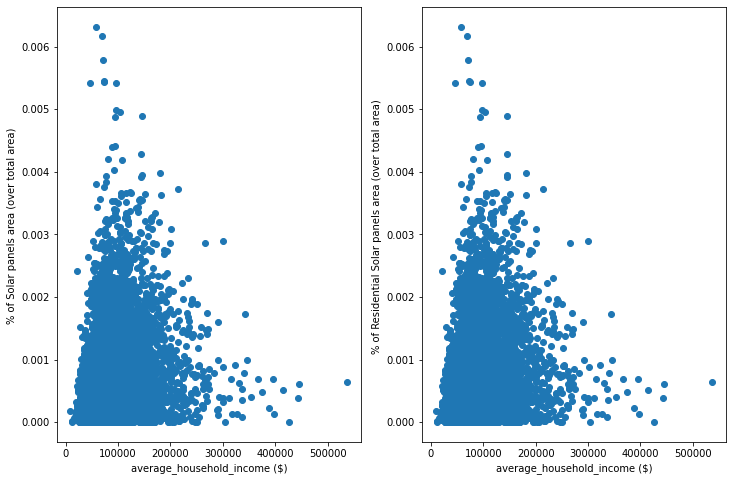

In [ ]:
#plot socio-demographics

fig,(ax1,ax2)= plt.subplots(1, 2,figsize=(12,8))
ax1.scatter(data['average_household_income'], data['solar_panel_area_divided_by_area']/(2.59*10**6))
ax1.set(xlabel='average_household_income ($)', ylabel= '% of Solar panels area (over total area) ')
ax2.scatter(data['average_household_income'], data['%_residential_solar_panel_area'])
ax2.set(xlabel='average_household_income ($)', ylabel= '% of Residential Solar panels area (over total area) ')

fig.show() 

In [ ]:
import scipy.stats as sp

skew_solar =  sp.skew(data['%_residential_solar_panel_area'])
kurt_solar =  scipy.stats.kurtosis(data['%_residential_solar_panel_area'])

print(skew_solar,kurt_solar)

1.8529744926835057 5.693428872815661


In [ ]:
#decile of average household income as a function of  solar panels !

data['income_decile'] = pd.qcut(data['average_household_income'], 10,
                               labels = False)

solar_panels_percentage = np.zeros(10)
solar_panels_area_percentage = np.zeros(10)
solar_radiation = np.zeros(10)
how_rich = ["100%","90%","80%", "70%", "60%", "50%", "40%" ,"30%", "20%", "10%"]
for i in range(10):
    solar_panels_area_percentage[i] = 100*sum(data['%_residential_solar_panel_area'][data[(data.income_decile == i)].index.values].values)/sum(data['%_residential_solar_panel_area'].values)
    solar_panels_percentage[i] = 100*sum(data['solar_system_count_residential'][data[(data.income_decile == i)].index.values].values)/sum(data['solar_system_count_residential'].values)
    solar_radiation[i] = 100*sum(data['daily_solar_radiation'][data[(data.income_decile == i)].index.values].values)/sum(data['daily_solar_radiation'].values)


In [ ]:
##interpretation of the deciles: 0== top 100%
# top 10%
print(np.mean(data['average_household_income'][data[(data.income_decile == 0)].index.values].values))
print(np.mean(data['average_household_income'][data[(data.income_decile == 9)].index.values].values))

36616.07574433546
183235.45193362862


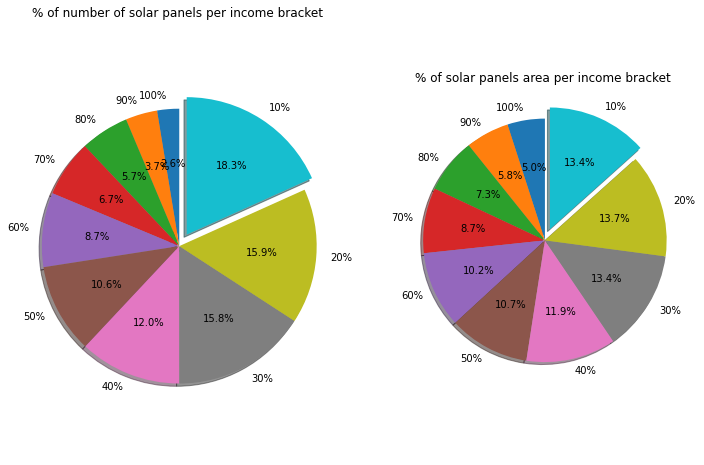

In [ ]:
#Refined analysis

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = how_rich 
sizes1 = solar_panels_percentage
sizes2 = solar_panels_area_percentage    
explode = (0,0,0,0,0,0,0,0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1,(ax1,ax2)= plt.subplots(1, 2,figsize=(12,8))
ax1.pie(sizes1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.pie(sizes2, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set(title = "% of number of solar panels per income bracket ")
ax2.set(title = "% of solar panels area per income bracket ")
plt.show()

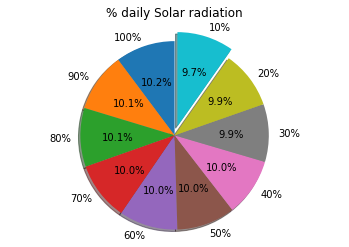

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = how_rich 
sizes = solar_radiation
explode = (0,0,0,0,0,0,0,0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% daily Solar radiation")
plt.show()

In [ ]:
#format incentive_count_residential
data['incentive_count_residential'] = pd.to_numeric(data['incentive_count_residential'], errors = 'coerce')
data.dropna(axis = 0,subset= ['incentive_count_residential'],inplace = True)
idx = data[data.incentive_count_residential < 0].index 
val = [data.incentive_count_residential[i] for i in idx]
print('The negative values on incentive_count_residential column are: ' + str(set(val))) 
data.drop(data[data.incentive_count_residential < 0].index,axis = 0, inplace = True) 


The negative values on incentive_count_residential column are: set()


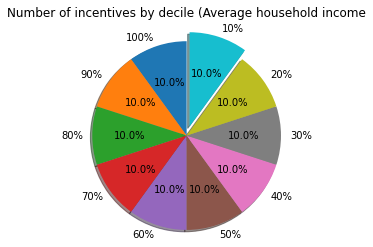

In [ ]:
nb_incentive = np.zeros(10)

for i in range(10):
    nb_incentive[i] = 100*sum(data['incentive_count_residential'][data[(data.income_decile == i)].index.values].values)/sum(data['incentive_count_residential'].values)


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = how_rich 
sizes =  nb_incentive
explode = (0,0,0,0,0,0,0,0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Number of incentives by decile (Average household income")
plt.show()

In [ ]:
nulls = data.isnull().sum().sort_values(ascending=False)[0:20]
data_2 = data.select_dtypes(include=[np.number]).interpolate().dropna(axis=0)
sum(data_2.isnull().sum() != 0)
data_2.shape

numeric = data_2.select_dtypes(include=[np.number])
numeric.head()
corr = numeric.corr()
cols1 = corr['%_residential_solar_panel_area'].sort_values(ascending=False)[:10]
cols2 = corr['daily_solar_radiation'].sort_values(ascending=False)[:10]

print(cols1)
print('\n')
print(cols2)


solar_panel_area_divided_by_area        1.000000
%_residential_solar_panel_area          1.000000
solar_system_count_residential          0.438047
number_of_solar_system_per_household    0.436479
total_panel_area_residential            0.425732
income_decile                           0.311415
average_household_income                0.235333
atmospheric_pressure                    0.149772
earth_temperature                       0.116430
lon                                     0.081946
Name: %_residential_solar_panel_area, dtype: float64


daily_solar_radiation                   1.000000
lon                                     0.697025
elevation                               0.618924
earth_temperature                       0.594196
wind_speed                              0.355005
voting_2012_gop_percentage              0.288111
voting_2016_gop_percentage              0.272357
average_household_size                  0.210600
total_panel_area_residential            0.056554
number_of_sola

From this first analysis, we can conclude that the actual grant attribution tends to bias solar panels' installation in California. Indeed, grants such as ITC being indexed on the  panels installed price, richer households installs more of them and receive more incentives (in absolute value) while not always being located on the most energy-producing areas (in terms of solar energy). In this second part, we will try to come up with a fairer grant policy to be implemented at the state scale. In order to do so, we will: 



*   Use google sunroof and produce a heat map to analyze the regions in California which have the most potential in terms of solar energy (refined analysis compared to the first order analysis from Stanford/Berkeley).  
*   Income_by_zipcode data file for the financial part. 
*   Incentive to install (education/voting = Stanford)
*   Come with a metric
*  Compare our predictions with the model developped on the google sunroof cities

cross-reference: income, zipcode, incentive to vote
Train previous stanford without the cities of the zipcode data set
predict on these ones
show discrepencies with our new model (i.e new metric taking into account equally [i.e same correlation coeff] income, incentive to install [education\voting] and installed price).

In [ ]:
data.head()

,solar_system_count_residential,fips,average_household_income,county,state,total_area,solar_panel_area_divided_by_area,population,total_panel_area_residential,average_household_size,...,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2012_dem_percentage,voting_2012_gop_percentage,number_of_solar_system_per_household,incentive_count_residential,incentive_residential_state_level,household_count,%_residential_solar_panel_area,income_decile
108,66.0,6037504001,88640.331010,Los Angeles County,ca,0.535486,3027.840598,6048,1621.365948,3.25,...,0.714072,0.233887,0.689,0.288,0.057491,75,15,1148,0.001169,6
109,99.0,6037504002,99115.358593,Los Angeles County,ca,0.596015,3665.605115,5284,2184.755999,3.38,...,0.714072,0.233887,0.689,0.288,0.066982,75,15,1478,0.001415,7
110,65.0,6037700700,414706.238185,Los Angeles County,ca,1.363258,1337.820019,3578,1823.793843,3.38,...,0.714072,0.233887,0.689,0.288,0.061437,75,15,1058,0.000517,9
111,38.0,6037700801,107896.201580,Los Angeles County,ca,0.561688,1897.528229,6194,1065.819405,2.33,...,0.714072,0.233887,0.689,0.288,0.014291,75,15,2659,0.000733,7
112,15.0,6037700802,123826.462548,Los Angeles County,ca,0.264832,1446.602405,3418,383.106753,1.87,...,0.714072,0.233887,0.689,0.288,0.008201,75,15,1829,0.000559,8


In [ ]:
#reset indices of the dataset data

data.reset_index(inplace=True)
data.head()


,index,solar_system_count_residential,fips,average_household_income,county,state,total_area,solar_panel_area_divided_by_area,population,total_panel_area_residential,...,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2012_dem_percentage,voting_2012_gop_percentage,number_of_solar_system_per_household,incentive_count_residential,incentive_residential_state_level,household_count,%_residential_solar_panel_area,income_decile
0,108,66.0,6037504001,88640.331010,Los Angeles County,ca,0.535486,3027.840598,6048,1621.365948,...,0.714072,0.233887,0.689,0.288,0.057491,75,15,1148,0.001169,6
1,109,99.0,6037504002,99115.358593,Los Angeles County,ca,0.596015,3665.605115,5284,2184.755999,...,0.714072,0.233887,0.689,0.288,0.066982,75,15,1478,0.001415,7
2,110,65.0,6037700700,414706.238185,Los Angeles County,ca,1.363258,1337.820019,3578,1823.793843,...,0.714072,0.233887,0.689,0.288,0.061437,75,15,1058,0.000517,9
3,111,38.0,6037700801,107896.201580,Los Angeles County,ca,0.561688,1897.528229,6194,1065.819405,...,0.714072,0.233887,0.689,0.288,0.014291,75,15,2659,0.000733,7
4,112,15.0,6037700802,123826.462548,Los Angeles County,ca,0.264832,1446.602405,3418,383.106753,...,0.714072,0.233887,0.689,0.288,0.008201,75,15,1829,0.000559,8


In [ ]:
#drop the created index column
data.drop(columns = 'index', axis = 1, inplace = True)

In [ ]:
#test
data.head()


,solar_system_count_residential,fips,average_household_income,county,state,total_area,solar_panel_area_divided_by_area,population,total_panel_area_residential,average_household_size,...,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2012_dem_percentage,voting_2012_gop_percentage,number_of_solar_system_per_household,incentive_count_residential,incentive_residential_state_level,household_count,%_residential_solar_panel_area,income_decile
0,66.0,6037504001,88640.331010,Los Angeles County,ca,0.535486,3027.840598,6048,1621.365948,3.25,...,0.714072,0.233887,0.689,0.288,0.057491,75,15,1148,0.001169,6
1,99.0,6037504002,99115.358593,Los Angeles County,ca,0.596015,3665.605115,5284,2184.755999,3.38,...,0.714072,0.233887,0.689,0.288,0.066982,75,15,1478,0.001415,7
2,65.0,6037700700,414706.238185,Los Angeles County,ca,1.363258,1337.820019,3578,1823.793843,3.38,...,0.714072,0.233887,0.689,0.288,0.061437,75,15,1058,0.000517,9
3,38.0,6037700801,107896.201580,Los Angeles County,ca,0.561688,1897.528229,6194,1065.819405,2.33,...,0.714072,0.233887,0.689,0.288,0.014291,75,15,2659,0.000733,7
4,15.0,6037700802,123826.462548,Los Angeles County,ca,0.264832,1446.602405,3418,383.106753,1.87,...,0.714072,0.233887,0.689,0.288,0.008201,75,15,1829,0.000559,8


# Optimization 

We are going to create a new dataset that gathers electricity potential data (google sunroof), income data, and incentive to install solar panels (i.e voting preferences data. 

## Google Sunroof

### Formatting



In [ ]:
data_sunroof = pd.read_csv('/content/drive/MyDrive/1.001 Project/Google Sunroof/project_sunroof_postal_code.csv')

In [ ]:
#visualize the data set 
data_sunroof.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,NaN,NaN,32.542257,32.542257,-117.030078,-117.030078,32.542257,-117.030078,1304.75,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.000000,0
1,1001.0,Massachusetts,42.099647,42.031153,-72.585478,-72.661521,42.067573,-72.623099,969.85,43,...,1.277903e+04,1.857622e+05,9.499651e+04,6.407655e+04,9.946072e+04,5866.558057,4.570750e+05,"[[0,22],[5,10],[10,6],[15,1],[20,1],[35,2],[55...",197.909043,0
2,1013.0,Massachusetts,42.197571,42.127819,-72.585709,-72.626135,42.162403,-72.607630,969.85,4548,...,1.403366e+06,1.668511e+07,8.920993e+06,7.583437e+06,2.689872e+07,6425.033374,6.149163e+07,"[[0,1847],[5,1763],[10,489],[15,150],[20,66],[...",26625.281247,10
3,1020.0,Massachusetts,42.218603,42.139015,-72.514267,-72.608908,42.176097,-72.574750,969.85,6310,...,2.884564e+06,2.185357e+07,1.561708e+07,1.473892e+07,5.168227e+07,6849.003143,1.067764e+08,"[[0,2291],[5,2435],[10,842],[15,292],[20,111],...",46233.148051,15
4,1022.0,Massachusetts,42.213156,42.178030,-72.530488,-72.575590,42.194646,-72.558203,969.85,638,...,2.246585e+06,5.434798e+06,4.445158e+06,3.264328e+06,3.271278e+07,12660.039972,4.810365e+07,"[[0,142],[5,145],[10,102],[15,68],[20,24],[25,...",20828.412212,2


In [ ]:
#columns of interest 

cols = ['state_name','region_name', 'count_qualified', 'percent_qualified', 'kw_total', 'kw_median', 'existing_installs_count']

data_sunroof = data_sunroof[cols]

In [ ]:
#clean data 

#keep only california state
print(data_sunroof.shape)
data_sunroof.drop(data_sunroof[data_sunroof.state_name != 'California'].index,axis = 0, inplace = True) 
print(data_sunroof.shape)

data_sunroof.head()

(10621, 7)
(1178, 7)


,state_name,region_name,count_qualified,percent_qualified,kw_total,kw_median,existing_installs_count
9015,California,90001.0,8627,67.477513,112030.50,5.50,17
9016,California,90002.0,7573,74.913443,72093.25,5.50,24
9017,California,90003.0,10529,75.217888,102646.75,6.00,39
9018,California,90005.0,1677,75.303098,39371.75,9.75,24
9019,California,90006.0,4266,79.000000,75622.75,7.75,30


In [ ]:
#convert zipcode to int + clean the NAN and negative ones 

data_sunroof['region_name'] = pd.to_numeric(data_sunroof['region_name'], errors = 'coerce')
data_sunroof.dropna(axis = 0,subset= ['region_name'],inplace = True)
idx = data_sunroof[data_sunroof.region_name < 0].index 
val = [data_sunroof.region_name[i] for i in idx]
print('The negative values on zipcode column are: ' + str(set(val))) 
data_sunroof['region_name'] = data_sunroof['region_name'].astype('int64')

The negative values on zipcode column are: set()


In [ ]:
#drop any row that has a NAN value 

print(data_sunroof.shape)
data_sunroof.dropna(inplace = True)
print(data_sunroof.shape)

(1178, 8)
(1074, 8)


In [ ]:
#reset indices of Google sunroof data set 

data_sunroof.reset_index(inplace=True)
data_sunroof.head()

,index,state_name,region_name,count_qualified,percent_qualified,kw_total,kw_median,existing_installs_count,Mean_income
0,0,California,90001,8627,67.477513,112030.50,5.50,17,57935.0
1,1,California,90002,7573,74.913443,72093.25,5.50,24,54170.0
2,2,California,90003,10529,75.217888,102646.75,6.00,39,54272.0
3,3,California,90005,1677,75.303098,39371.75,9.75,24,59439.0
4,4,California,90006,4266,79.000000,75622.75,7.75,30,53427.0


In [ ]:
data_sunroof.drop(labels = 'index', axis = 1, inplace = True)
data_sunroof.head()

,state_name,region_name,count_qualified,percent_qualified,kw_total,kw_median,existing_installs_count,Mean_income
0,California,90001,8627,67.477513,112030.50,5.50,17,57935.0
1,California,90002,7573,74.913443,72093.25,5.50,24,54170.0
2,California,90003,10529,75.217888,102646.75,6.00,39,54272.0
3,California,90005,1677,75.303098,39371.75,9.75,24,59439.0
4,California,90006,4266,79.000000,75622.75,7.75,30,53427.0


We will now use other datasets and cross reference the different quantities needed for each city of the google sunroof dataset. 

### Cross-reference: income (by zipcode)

In [ ]:
#data set
data_income_zip = pd.read_csv('/content/drive/MyDrive/1.001 Project/Income by zipcode/income_by_zipcode.csv')

In [ ]:
#keep the columns of interest

cols = ['NAME','S1902_C03_001E']
data_income_zip = data_income_zip[cols]
data_income_zip.drop(labels = 0, axis = 0, inplace =True)

data_income_zip.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,NAME,S1902_C03_001E
1,ZCTA5 89010,53109
2,ZCTA5 89019,86818
3,ZCTA5 89060,56469
4,ZCTA5 89061,62940
5,ZCTA5 89439,89705


In [ ]:
#Rename the columns by explicit names
data_income_zip.rename(columns = {'NAME':'Zipcode', 'S1902_C03_001E':'Mean_income'}, inplace = True)

In [ ]:
#reset indices of income_by_zipcode data set 

data_income_zip.reset_index(inplace=True)
data_income_zip.head()

,index,Zipcode,Mean_income
0,1,ZCTA5 89010,53109
1,2,ZCTA5 89019,86818
2,3,ZCTA5 89060,56469
3,4,ZCTA5 89061,62940
4,5,ZCTA5 89439,89705


In [ ]:
#drops old indices
data_income_zip.drop(labels = 'index', axis = 1, inplace = True)
data_income_zip.head()

,Zipcode,Mean_income
0,ZCTA5 89010,53109
1,ZCTA5 89019,86818
2,ZCTA5 89060,56469
3,ZCTA5 89061,62940
4,ZCTA5 89439,89705


In [ ]:
N = len(data_income_zip['Zipcode'])
length_zipcodes = []
for i in range(N): 
  length_zipcodes.append(len(data_income_zip['Zipcode'][i]))

print(set(length_zipcodes))
print(data_income_zip['Zipcode'][0])
print(type(data_income_zip['Zipcode'][0]))

#All strings for zipcodes have length 11 and are of the form ZCTA5 + space + 5-digits zipcode

data_income_zip['Zipcode'] = data_income_zip['Zipcode'].str.slice(start=6) #slice the strings

data_income_zip.head()

{11}
ZCTA5 89010
<class 'str'>


,Zipcode,Mean_income
0,89010,53109
1,89019,86818
2,89060,56469
3,89061,62940
4,89439,89705


In [ ]:
#format 'Zipcode'

print(data_income_zip.shape)
data_income_zip['Zipcode'] = pd.to_numeric(data_income_zip['Zipcode'], errors = 'coerce')
data_income_zip.dropna(axis = 0,subset= ['Zipcode'],inplace = True)
idx = data_income_zip[data_income_zip.Zipcode < 0].index 
val = [data_income_zip.Zipcode[i] for i in idx]
print('The negative values on zipcode column are: ' + str(set(val))) 
print(data_income_zip.shape)

(1769, 2)
The negative values on zipcode column are: set()
(1769, 2)


In [ ]:
#format mean income 

data_income_zip['Mean_income'] = pd.to_numeric(data_income_zip['Mean_income'], errors = 'coerce')
data_income_zip.dropna(axis = 0,subset= ['Mean_income'],inplace = True)
idx = data_income_zip[data_income_zip.Mean_income < 0].index 
val = [data_income_zip.Mean_income[i] for i in idx]
print('The negative values on mean income column are: ' + str(set(val)))
print(data_income_zip.shape) 

The negative values on mean income column are: set()
(1676, 2)


In [ ]:
## CROSS REFERENCE: The mean income will be stored in a new column of google sunroof as function of their zipcode


N2 = len(data_sunroof['region_name'])
data_sunroof['Mean_income'] = 0
for i in tqdm(range(N2)): 
  idxs = data_income_zip[data_income_zip.Zipcode == data_sunroof['region_name'][i]].index
  data_sunroof['Mean_income'][i] = data_income_zip['Mean_income'][idxs]

  0%|          | 0/1074 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 1074/1074 [00:01<00:00, 711.01it/s]


In [ ]:
#drop the rows of data_sunroof where Mean income = 0 (this means that we dont have data)
print(data_sunroof.shape)
data_sunroof.drop(data_sunroof[data_sunroof.Mean_income == 0].index,axis = 0, inplace = True) 
print(data_sunroof.shape)

(1074, 8)
(1074, 8)


In [ ]:
data_sunroof.head()

,state_name,region_name,count_qualified,percent_qualified,kw_total,kw_median,existing_installs_count,Mean_income
0,California,90001,8627,67.477513,112030.50,5.50,17,57935
1,California,90002,7573,74.913443,72093.25,5.50,24,54170
2,California,90003,10529,75.217888,102646.75,6.00,39,54272
3,California,90005,1677,75.303098,39371.75,9.75,24,59439
4,California,90006,4266,79.000000,75622.75,7.75,30,53427


In [ ]:
#check that the data set has 0 nans

data_sunroof.isna().sum().sum()

0

### Cross-reference: zipcode by city 

In [ ]:
!pip install uszipcode

     |████████████████████████████████| 76 kB 2.3 MB/s 
     |████████████████████████████████| 120 kB 25.8 MB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 
     |████████████████████████████████| 42 kB 957 kB/s 


In [ ]:
from uszipcode import SearchEngine
engine = SearchEngine()
print(type(engine.by_zipcode(90001)))

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!
<class 'uszipcode.model.SimpleZipcode'>


In [ ]:
from uszipcode import SearchEngine
data_sunroof['City'] = 0
engine = SearchEngine()
N = len(data_sunroof['region_name'])
ref = engine.by_zipcode(90001)
for i in tqdm(range(N)):
    zipcode = engine.by_zipcode(data_sunroof['region_name'][i])
    if type(zipcode) == type(ref):
        data_sunroof['City'][i] = zipcode.major_city

  0%|          | 0/1074 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
 11%|█         | 117/1074 [00:00<00:00, 1168.62it/s]Exception ignored in: <function SearchEngine.__del__ at 0x7fa214ff1c20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.7/dis

In [ ]:
data_sunroof.head()

,state_name,region_name,count_qualified,percent_qualified,kw_total,kw_median,existing_installs_count,Mean_income,City
0,California,90001,8627,67.477513,112030.50,5.50,17,57935,Los Angeles
1,California,90002,7573,74.913443,72093.25,5.50,24,54170,Los Angeles
2,California,90003,10529,75.217888,102646.75,6.00,39,54272,Los Angeles
3,California,90005,1677,75.303098,39371.75,9.75,24,59439,Los Angeles
4,California,90006,4266,79.000000,75622.75,7.75,30,53427,Los Angeles


### Cross reference: Republican voting %

In [ ]:
#voting tendancies by city 

table_wiki = pd.read_html('https://en.wikipedia.org/wiki/California_locations_by_voter_registration')

print(f'Total tables: {len(table_wiki)}')

voting_data = table_wiki[3]

Total tables: 5


In [ ]:
#rename the column county

voting_data.rename(columns = {'County[4]':'County', 'Republican[2]':'Republican'}, inplace = True)


In [ ]:
voting_data.head()

,City,County,Population[4],Registered voters[2][note 1],Democratic[2],Republican,D–R spread[2],Other[2],No party preference[2]
0,Alameda,Alameda,73239,61.3%,55.1%,14.5%,+40.6%,11.9%,20.7%
1,Albany,Alameda,18217,59.1%,64.0%,6.5%,+57.5%,11.8%,18.9%
2,Berkeley,Alameda,111008,72.9%,64.7%,4.4%,+60.3%,15.3%,17.0%
3,Dublin,Alameda,44171,52.7%,42.7%,24.6%,+18.1%,14.3%,21.3%
4,Emeryville,Alameda,9698,64.7%,59.6%,7.6%,+52.0%,15.3%,19.5%


In [ ]:
#formating percentage
voting_data['Republican'] = voting_data['Republican'].str.slice(stop = -1) #slice the strings

In [ ]:
voting_data.head()

,City,County,Population[4],Registered voters[2][note 1],Democratic[2],Republican,D–R spread[2],Other[2],No party preference[2]
0,Alameda,Alameda,73239,61.3%,55.1%,14.5,+40.6%,11.9%,20.7%
1,Albany,Alameda,18217,59.1%,64.0%,6.5,+57.5%,11.8%,18.9%
2,Berkeley,Alameda,111008,72.9%,64.7%,4.4,+60.3%,15.3%,17.0%
3,Dublin,Alameda,44171,52.7%,42.7%,24.6,+18.1%,14.3%,21.3%
4,Emeryville,Alameda,9698,64.7%,59.6%,7.6,+52.0%,15.3%,19.5%


In [ ]:
print(voting_data.shape)
voting_data['Republican'] = pd.to_numeric(voting_data['Republican'], errors = 'coerce')
voting_data.dropna(axis = 0,subset= ['Republican'],inplace = True)
idx = voting_data[voting_data.Republican < 0].index 
val = [voting_data.Republican[i] for i in idx]
print('The negative values on republican percentage column are: ' + str(set(val))) 
print(voting_data.shape)

(482, 9)
The negative values on republican percentage column are: set()
(482, 9)


In [ ]:
voting_data.head()

,City,County,Population[4],Registered voters[2][note 1],Democratic[2],Republican,D–R spread[2],Other[2],No party preference[2]
0,Alameda,Alameda,73239,61.3%,55.1%,14.5,+40.6%,11.9%,20.7%
1,Albany,Alameda,18217,59.1%,64.0%,6.5,+57.5%,11.8%,18.9%
2,Berkeley,Alameda,111008,72.9%,64.7%,4.4,+60.3%,15.3%,17.0%
3,Dublin,Alameda,44171,52.7%,42.7%,24.6,+18.1%,14.3%,21.3%
4,Emeryville,Alameda,9698,64.7%,59.6%,7.6,+52.0%,15.3%,19.5%


In [ ]:
#match each city from Google Sunroof with its voting tendencies using voting_data dataset


N2 = len(data_sunroof['region_name'])
data_sunroof['Voting_Republicans'] = 0.1 #float type column 
for i in tqdm(range(N2)): 
  idxs = voting_data[voting_data.City == data_sunroof['City'][i]].index
  data_sunroof['Voting_Republicans'][i] = voting_data['Republican'][idxs]

  0%|          | 0/1074 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
  4%|▍         | 45/1074 [00:00<00:02, 447.62it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 1074/1074 [00:02<00:00, 426.15it/s]


In [ ]:
data_sunroof

,state_name,region_name,count_qualified,percent_qualified,kw_total,kw_median,existing_installs_count,Mean_income,City,Voting_Republicans
0,California,90001,8627,67.477513,112030.50,5.50,17,57935,Los Angeles,15.9
1,California,90002,7573,74.913443,72093.25,5.50,24,54170,Los Angeles,15.9
2,California,90003,10529,75.217888,102646.75,6.00,39,54272,Los Angeles,15.9
3,California,90005,1677,75.303098,39371.75,9.75,24,59439,Los Angeles,15.9
4,California,90006,4266,79.000000,75622.75,7.75,30,53427,Los Angeles,15.9
...,...,...,...,...,...,...,...,...,...,...
1069,California,96062,13,68.421053,161.75,9.25,1,95888,Millville,NaN
1070,California,96069,1,100.000000,17.50,17.50,0,78717,Oak Run,NaN
1071,California,96073,1086,74.485597,18044.25,10.50,37,119109,Palo Cedro,NaN
1072,California,96087,61,50.000000,730.25,6.25,2,70830,Shasta,NaN


In [ ]:
print(data_sunroof.shape)
data_sunroof.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print(data_sunroof.shape)

(1074, 10)
(874, 10)


In [ ]:
data_sunroof.isna().sum().sum() 

0

In [ ]:
#reset indices of data_sunroof 


data_sunroof.reset_index(inplace=True)
data_sunroof.head()
data_sunroof.drop(labels = 'index', axis = 1, inplace = True)
data_sunroof.head()

,state_name,region_name,count_qualified,percent_qualified,kw_total,kw_median,existing_installs_count,Mean_income,City,Voting_Republicans,Grant
0,California,90001,8627,67.477513,112030.50,5.50,17,57935,Los Angeles,15.9,99830.79
1,California,90002,7573,74.913443,72093.25,5.50,24,54170,Los Angeles,15.9,105714.00
2,California,90003,10529,75.217888,102646.75,6.00,39,54272,Los Angeles,15.9,0.00
3,California,90005,1677,75.303098,39371.75,9.75,24,59439,Los Angeles,15.9,0.00
4,California,90006,4266,79.000000,75622.75,7.75,30,53427,Los Angeles,15.9,0.00


### Cross-reference: Grant by zipcode (from Berkeley data set) 

In [ ]:
N3 = len(data_sunroof['region_name'])
data_sunroof['Grant'] = -1.2 #float type column 
for i in tqdm(range(N3)): 
  idxs = df_2[df_2.zip_code == data_sunroof['region_name'][i]].index
  data_sunroof['Grant'][i] = sum(df_2['rebate_or_grant'][idxs])

  0%|          | 0/874 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
100%|██████████| 874/874 [03:12<00:00,  4.54it/s]


In [ ]:
data_sunroof

,state_name,region_name,count_qualified,percent_qualified,kw_total,kw_median,existing_installs_count,Mean_income,City,Voting_Republicans,Grant
0,California,90001,8627,67.477513,112030.50,5.50,17,57935,Los Angeles,15.9,99830.79
1,California,90002,7573,74.913443,72093.25,5.50,24,54170,Los Angeles,15.9,105714.00
2,California,90003,10529,75.217888,102646.75,6.00,39,54272,Los Angeles,15.9,0.00
3,California,90005,1677,75.303098,39371.75,9.75,24,59439,Los Angeles,15.9,0.00
4,California,90006,4266,79.000000,75622.75,7.75,30,53427,Los Angeles,15.9,0.00
...,...,...,...,...,...,...,...,...,...,...,...
869,California,96002,10723,79.742694,178141.25,10.00,139,78042,Redding,46.7,190615.30
870,California,96003,15416,79.751681,257934.50,11.25,273,76049,Redding,46.7,463066.45
871,California,96007,7639,68.254110,121323.25,8.75,40,65765,Anderson,38.8,332978.00
872,California,96019,2953,63.125267,36434.50,7.75,12,60451,Shasta Lake,39.1,0.00


In [ ]:

print(data_sunroof.isna().sum().sum()) #check that there isnt any NAN

print(data_sunroof[data_sunroof.Grant == -1.2].index) #check that there isnt any unmatched value 
print(data_sunroof[data_sunroof.Mean_income == 0].index) #check that there any 0 mean income 
print(data_sunroof[data_sunroof.Voting_Republicans == 0].index) #check that there any 0 mean income 

0
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


### Political improvements

In [ ]:
# Total Grant given during the previous policies

grant_tot = sum(data_sunroof['Grant'])

grant_tot*10**(-9) #in billions 

0.6143705754985

We shall give the same amount but with a metric: 

each city shall receive a % of the amount as a function of the following metric: 

\begin{equation}
w_i = \left(\dfrac{1}{\text{Mean_income}} \right)^{\alpha}_{i} + \left( count_{qualified} \times kw_{median} \right)^{\beta}_{i} + 
\left(\dfrac{1}{\text{Voting_{republicans}}} \right)^{\gamma}_{i}
\end{equation}

As a a first approach, we have considered $\alpha = \gamma = 1$ and $\beta =2$ (i.e same weight for incentive and money but more importance on electricity production). 

The amount of money received by a city should then be $\dfrac{w_i}{\sum_{j} w_j}\times \text{Total Grant} $

In [ ]:
# Optimized grant

data_sunroof['weights'] = (data_sunroof['count_qualified']*data_sunroof['kw_median'])**2 + (1/data_sunroof['Mean_income']) +  (1/data_sunroof['Voting_Republicans'])
data_sunroof['Optimized_grant'] = data_sunroof['weights']/sum(data_sunroof['weights'])*grant_tot


In [ ]:
data_sunroof.head()

,state_name,region_name,count_qualified,percent_qualified,kw_total,kw_median,existing_installs_count,Mean_income,City,Voting_Republicans,Grant,weights,Optimized_grant
0,California,90001,8627,67.477513,112030.50,5.50,17,57935,Los Angeles,15.9,99830.79,2.251360e+09,171594.171765
1,California,90002,7573,74.913443,72093.25,5.50,24,54170,Los Angeles,15.9,105714.00,1.734847e+09,132226.605953
2,California,90003,10529,75.217888,102646.75,6.00,39,54272,Los Angeles,15.9,0.00,3.990954e+09,304182.559529
3,California,90005,1677,75.303098,39371.75,9.75,24,59439,Los Angeles,15.9,0.00,2.673470e+08,20376.656036
4,California,90006,4266,79.000000,75622.75,7.75,30,53427,Los Angeles,15.9,0.00,1.093063e+09,83311.060927


In [ ]:
#average discrepency (per city)

data_sunroof['Error'] = abs(data_sunroof['Optimized_grant'] - data_sunroof['Grant'])

In [ ]:
data_sunroof

,state_name,region_name,count_qualified,percent_qualified,kw_total,kw_median,existing_installs_count,Mean_income,City,Voting_Republicans,Grant,weights,Optimized_grant,Error
0,California,90001,8627,67.477513,112030.50,5.50,17,57935,Los Angeles,15.9,99830.79,2.251360e+09,1.715942e+05,7.176338e+04
1,California,90002,7573,74.913443,72093.25,5.50,24,54170,Los Angeles,15.9,105714.00,1.734847e+09,1.322266e+05,2.651261e+04
2,California,90003,10529,75.217888,102646.75,6.00,39,54272,Los Angeles,15.9,0.00,3.990954e+09,3.041826e+05,3.041826e+05
3,California,90005,1677,75.303098,39371.75,9.75,24,59439,Los Angeles,15.9,0.00,2.673470e+08,2.037666e+04,2.037666e+04
4,California,90006,4266,79.000000,75622.75,7.75,30,53427,Los Angeles,15.9,0.00,1.093063e+09,8.331106e+04,8.331106e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,California,96002,10723,79.742694,178141.25,10.00,139,78042,Redding,46.7,190615.30,1.149827e+10,8.763754e+05,6.857601e+05
870,California,96003,15416,79.751681,257934.50,11.25,273,76049,Redding,46.7,463066.45,3.007796e+10,2.292482e+06,1.829416e+06
871,California,96007,7639,68.254110,121323.25,8.75,40,65765,Anderson,38.8,332978.00,4.467753e+09,3.405232e+05,7.545183e+03
872,California,96019,2953,63.125267,36434.50,7.75,12,60451,Shasta Lake,39.1,0.00,5.237576e+08,3.991975e+04,3.991975e+04


In [ ]:
#Statistical analysis
print(np.mean(data_sunroof['Error']))
print(min(data_sunroof['Error']))
print(max(data_sunroof['Error']))

593586.5516223231
0.38692780217424005
8173008.230728374


In [ ]:
from scipy.optimize import minimize

In [ ]:
data_sunroof['weights'] = (data_sunroof['count_qualified']*data_sunroof['kw_median'])**2 + (1/data_sunroof['Mean_income']) +  (1/data_sunroof['Voting_Republicans'])
data_sunroof['Optimized_grant'] = data_sunroof['weights']/sum(data_sunroof['weights'])*grant_tot

a_i = (data_sunroof['count_qualified']*data_sunroof['kw_median']).values
b_i = (1/data_sunroof['Mean_income']).values
c_i = (1/data_sunroof['Voting_Republicans']).values
g_i = (data_sunroof['Grant']).values
#objective function 

def f_obj(x,y,z): 
 obj = sum(abs((a_i**x + b_i**y + c_i**z)/sum(a_i**x + b_i**y + c_i**z)*grant_tot -g_i))
 return obj

In [ ]:
#does not work 
# from scipy.optimize import Bounds

# bounds = Bounds([0.1, 10], [0.1, 10],[0.1, 10])
# x0 = [1,2,1]
# from scipy.optimize import SR1
# res = minimize(f_obj, x0, method='trust-constr',  jac="2-point", hess=SR1(),options={'verbose': 1}, bounds=bounds)

# print(res.x)

In [ ]:
sol = [0,0,0]
score = np.inf

for i in tqdm(range(-20,20)): 
  for j in range(-20,20): 
    for k in range(-20,20): 
        if f_obj(i,j,k) < score: 
          sol = [i,j,k]
          score = f_obj(i,j,k)

100%|██████████| 40/40 [00:37<00:00,  1.05it/s]


In [ ]:
sol

[2, -2, -6]